In [1]:
from __future__ import print_function

In [2]:
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [3]:
audio_path = '/home/chetan/Desktop/gans/music/Feldberg_-_You_and_Me-uDTaxJxZIX0.wav'

In [4]:
y, sr = librosa.load(audio_path)

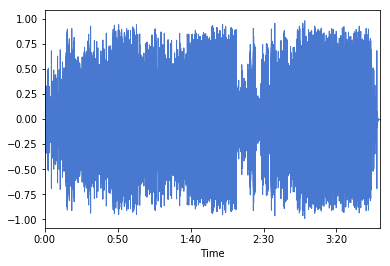

In [5]:
librosa.display.waveplot(y, sr=22050, max_points=50000.0, x_axis='time', offset=0.0, max_sr=1000, ax=None)

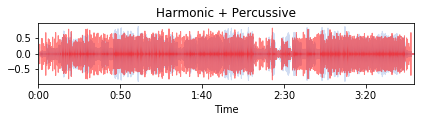

In [6]:
y_harm, y_perc = librosa.effects.hpss(y)
plt.subplot(3, 1, 3)
librosa.display.waveplot(y_harm, sr=sr, alpha=0.25)
librosa.display.waveplot(y_perc, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')
plt.tight_layout()


Text(0.5,1,'Monophonic')

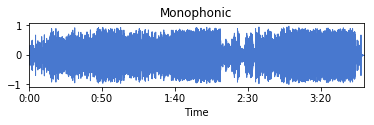

In [7]:
plt.figure()
plt.subplot(3, 1, 1)
librosa.display.waveplot(y, sr=sr)
plt.title('Monophonic')

Text(0.5,1,'Stereo')

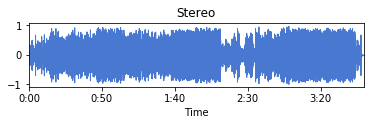

In [8]:
plt.subplot(3, 1, 2)
librosa.display.waveplot(y, sr=sr)
plt.title('Stereo')

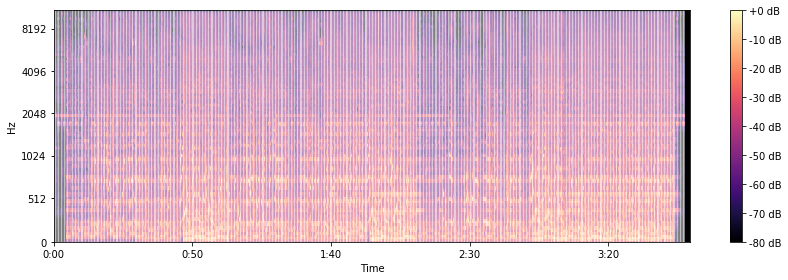

In [9]:
plt.figure(figsize=(12, 6))
y_harm, y_perc = librosa.effects.hpss(y)
tempo, beats = librosa.beat.beat_track(y=y_perc, sr=sr)
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Let's re-draw the spectrogram, but this time, overlay the detected beats
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Let's draw transparent lines over the beat frames
plt.vlines(librosa.frames_to_time(beats),
           1, 0.5 * sr,
           colors='w', linestyles='-', linewidth=2, alpha=0.5)

plt.axis('tight')

plt.colorbar(format='%+02.0f dB')

plt.tight_layout()


In [10]:
print('Estimated tempo:        %.2f BPM' % tempo)

print('First 5 beat frames:   ', beats[:5])

# Frame numbers are great and all, but when do those beats occur?
print('First 5 beat times:    ', librosa.frames_to_time(beats[:5], sr=sr))

# We could also get frame numbers from times by librosa.time_to_frames()

Estimated tempo:        112.35 BPM
First 5 beat frames:    [ 0 23 45 68 91]
First 5 beat times:     [ 0.          0.53405896  1.04489796  1.57895692  2.11301587]


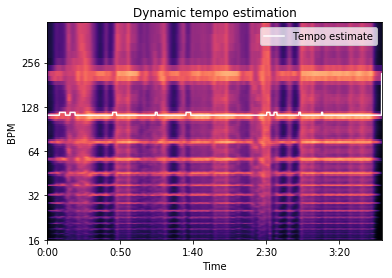

In [12]:
onset_env = librosa.onset.onset_strength(y, sr=sr) 
dtempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr,aggregate=None)
hop_length = 512

plt.figure()
tg = librosa.feature.tempogram(onset_envelope=onset_env, sr=sr,
                               hop_length=hop_length)
librosa.display.specshow(tg, x_axis='time', y_axis='tempo')
plt.plot(librosa.frames_to_time(np.arange(len(dtempo))), dtempo,
          color='w', linewidth=1.5, label='Tempo estimate')
plt.title('Dynamic tempo estimation')
plt.legend(frameon=True, framealpha=0.75)